# Przygotowanie środowisk

In [ ]:
!pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.1-py3-none-any.whl size=146923 sha256=527d445f32b093e7a2ffa460d3b8a9489d3f33acf07cb04547df98c1876f37a1
  Stored in directory: /root/.cache/pip/wheels/75/bc/fd/739778254a2881ef96b139d0aaf60c6d4f9130bb1459b48f10
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=b469d5e43a3a92de1e2febfb9fd9ca267836079aaf1ccc28f75e329b5231965f
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [ ]:
!pip install smac

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.4 MB/s eta 0:00:00
  Created wheel for smac: filename=smac-2.0.2-py3-none-any.whl size=207413 sha256=a185e80a1fb030d79a31330aceb1d206a7a9bcf10a711b851f77caca9db254ba
  Stored in directory: /root/.cache/pip/wheels/9e/7b/0f/70fa663d850965f42f74fd6ed340a48de9e0f88526e4c57fa4
  Created wheel for pynisher: fil

In [ ]:
from ConfigSpace import Configuration, ConfigurationSpace

In [ ]:
import csv

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, KFold
from openml import datasets
from sklearn import set_config
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn import set_config
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

set_config(transform_output = "pandas")

In [ ]:
from smac import HyperparameterOptimizationFacade, Scenario
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from inspect import getblock
from ConfigSpace.hyperparameters import UniformFloatHyperparameter, UniformIntegerHyperparameter

In [ ]:
import openml

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from skopt import BayesSearchCV

In [ ]:
from google.colab import drive
from google.colab import files

# Dane

## Zbiory danych

In [ ]:
datasets = ['credit-g','Phoneme', 'Diabetes','kc2']

## Obróbka

In [ ]:
# Define the selector for numeric and categorical features
numeric_selector = make_column_selector(dtype_include=np.number)
categorical_selector = make_column_selector(dtype_include=['category', 'object'])

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # You can choose a different strategy for imputation
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can choose a different strategy for imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_trans = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_selector),
        ('cat', categorical_transformer, categorical_selector)
    ])

In [ ]:
def preprocess_dataset(dataset_name):
    # Download dataset
    dataset = openml.datasets.get_dataset(dataset_name)
    X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='array')

    # Create DataFrame
    feature_names = [f"feature_{i}" for i in range(X.shape[1])]
    target_name = "target"
    df = pd.DataFrame(X, columns=feature_names)
    df[target_name] = y

    # Split into features and target
    X = df.drop(target_name, axis=1)
    y = df[target_name]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit and transform the training set
    X_train_transformed = col_trans.fit_transform(X_train)

    # Transform the test set
    X_test_transformed = col_trans.transform(X_test)

    return X_train_transformed, X_test_transformed, y_train, y_test

# Tunowanie

## Hiperparametry

In [ ]:
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf','linear','poly']

param_dist={'C':C,
              'gamma':gamma,
              'kernel':kernel
           }


## Klasyfikator

In [ ]:
svc = SVC()

### Randomized Search

In [ ]:
n_iter=10

In [ ]:
random_optim_results = []
random_results = []
max_scores = []
accuracy_diffs = []

In [ ]:
for dataset_name in datasets:
  X_train, X_test, y_train, y_test = preprocess_dataset(dataset_name)

  # Initialize RandomizedSearchCV
  random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=n_iter, cv=10, n_jobs=-1, random_state=42, error_score='raise')
  random_search.fit(X_train, y_train)

  # Fit the model
  random_search.fit(X_train, y_train)

  # Get the best parameters and best score
  best_params = random_search.best_params_
  best_score = random_search.best_score_

  # Use the best parameters to train the final model
  final_model = random_search.best_estimator_

  # Evaluate the model on the test set
  test_accuracy = final_model.score(X_test, y_test)

  # Get the mean test score for all classifiers
  mean_test_scores = random_search.cv_results_['mean_test_score']

  # Append results to the list
  random_optim_results.append({
        'Dataset': dataset_name,
        'Best_Parameters': best_params,
        'Best_Score': best_score,
        'Test_Accuracy': test_accuracy,
  })

  # Get the mean test score for all classifiers
  scores_history = random_search.cv_results_

  # Extract 'params' and 'mean_test_score' from scores_history
  theta = scores_history['params']
  scores = scores_history['mean_test_score']

  # Create a DataFrame for the current dataset
  df_dataset = pd.DataFrame({f'score_{dataset_name}': scores})

  # Append the DataFrame to the results list
  random_results.append(df_dataset)


# Calculate the maximum score so far over the iterations
  max_score = np.maximum.accumulate(mean_test_scores)
  max_scores.append(max_score)

  # Calculate the difference in accuracies
  accuracy_diff = mean_test_scores - test_accuracy
  accuracy_diffs.append(accuracy_diff)

  # Save the results with unique names
  result_filename = f'results_{dataset_name}_random_search.csv'
  with open(result_filename, 'w') as file:
    file.write(f'Best Parameters: {best_params}\n')
    file.write(f'Best Cross-Validation Accuracy: {best_score}\n')
    file.write(f'Test Set Accuracy: {test_accuracy}\n')
    file.write('\nMean Test Scores for all Classifiers:\n')

    for score in mean_test_scores:
      file.write(f'{score}\n')

  files.download(result_filename)


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-15-978857f3a485>:4: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='array')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-15-978857f3a485>:4: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='array')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-15-978857f3a485>:4: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='array')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-15-978857f3a485>:4: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='array')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
random_optim_results

[{'Dataset': 'credit-g',
  'Best_Parameters': {'kernel': 'rbf', 'gamma': 0.001, 'C': 1000},
  'Best_Score': 0.75625,
  'Test_Accuracy': 0.78},
 {'Dataset': 'Phoneme',
  'Best_Parameters': {'kernel': 'rbf', 'gamma': 0.1, 'C': 1000},
  'Best_Score': 0.8623663501839021,
  'Test_Accuracy': 0.8584643848288621},
 {'Dataset': 'Diabetes',
  'Best_Parameters': {'kernel': 'linear', 'gamma': 1, 'C': 1000},
  'Best_Score': 0.7703067160232682,
  'Test_Accuracy': 0.7597402597402597},
 {'Dataset': 'kc2',
  'Best_Parameters': {'kernel': 'rbf', 'gamma': 0.1, 'C': 1000},
  'Best_Score': 0.8440766550522648,
  'Test_Accuracy': 0.7428571428571429}]

In [ ]:
random_theta = pd.DataFrame({'theta': theta})
random_theta

,theta
0,"{'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}"
1,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}"
2,"{'kernel': 'linear', 'gamma': 0.001, 'C': 0.1}"
3,"{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}"
4,"{'kernel': 'poly', 'gamma': 0.1, 'C': 10}"
5,"{'kernel': 'linear', 'gamma': 1, 'C': 1000}"
6,"{'kernel': 'linear', 'gamma': 0.0001, 'C': 1}"
7,"{'kernel': 'rbf', 'gamma': 0.0001, 'C': 0.1}"
8,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}"
9,"{'kernel': 'linear', 'gamma': 0.1, 'C': 1000}"


In [ ]:
random_df = pd.concat(random_results, axis=1)
random_df

,score_credit-g,score_Phoneme,score_Diabetes,score_kc2
0,0.75250,0.769373,0.768667,0.834437
1,0.71500,0.862366,0.679138,0.844077
2,0.75250,0.769373,0.768667,0.834437
3,0.69875,0.832523,0.653120,0.803368
4,0.68000,0.763591,0.744209,0.829617
5,0.75125,0.770762,0.770307,0.815331
6,0.74875,0.770531,0.770307,0.834379
7,0.69875,0.705760,0.653120,0.803368
8,0.75625,0.783015,0.758831,0.819977
9,0.75125,0.770762,0.770307,0.815331


In [ ]:
random_df=pd.concat([random_theta,random_df], axis=1)
random_df

,theta,score_credit-g,score_Phoneme,score_Diabetes,score_kc2
0,"{'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}",0.75250,0.769373,0.768667,0.834437
1,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}",0.71500,0.862366,0.679138,0.844077
2,"{'kernel': 'linear', 'gamma': 0.001, 'C': 0.1}",0.75250,0.769373,0.768667,0.834437
3,"{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}",0.69875,0.832523,0.653120,0.803368
4,"{'kernel': 'poly', 'gamma': 0.1, 'C': 10}",0.68000,0.763591,0.744209,0.829617
5,"{'kernel': 'linear', 'gamma': 1, 'C': 1000}",0.75125,0.770762,0.770307,0.815331
6,"{'kernel': 'linear', 'gamma': 0.0001, 'C': 1}",0.74875,0.770531,0.770307,0.834379
7,"{'kernel': 'rbf', 'gamma': 0.0001, 'C': 0.1}",0.69875,0.705760,0.653120,0.803368
8,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}",0.75625,0.783015,0.758831,0.819977
9,"{'kernel': 'linear', 'gamma': 0.1, 'C': 1000}",0.75125,0.770762,0.770307,0.815331


In [ ]:
means = pd.DataFrame({'mean': random_df.mean(axis=1)})

<ipython-input-25-f882bb47dd2a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = pd.DataFrame({'mean': random_df.mean(axis=1)})


In [ ]:
random_df=pd.concat([random_df,means], axis=1)
best_stat = random_df["mean"].max()
best_config = random_df.loc[random_df['mean'] == best_stat]
best_config

,theta,score_credit-g,score_Phoneme,score_Diabetes,score_kc2,mean
0,"{'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}",0.7525,0.769373,0.768667,0.834437,0.781244
2,"{'kernel': 'linear', 'gamma': 0.001, 'C': 0.1}",0.7525,0.769373,0.768667,0.834437,0.781244


In [ ]:
random_df

,theta,score_credit-g,score_Phoneme,score_Diabetes,score_kc2,mean
0,"{'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}",0.75250,0.769373,0.768667,0.834437,0.781244
1,"{'kernel': 'rbf', 'gamma': 0.1, 'C': 1000}",0.71500,0.862366,0.679138,0.844077,0.775145
2,"{'kernel': 'linear', 'gamma': 0.001, 'C': 0.1}",0.75250,0.769373,0.768667,0.834437,0.781244
3,"{'kernel': 'rbf', 'gamma': 1, 'C': 0.1}",0.69875,0.832523,0.653120,0.803368,0.746940
4,"{'kernel': 'poly', 'gamma': 0.1, 'C': 10}",0.68000,0.763591,0.744209,0.829617,0.754354
5,"{'kernel': 'linear', 'gamma': 1, 'C': 1000}",0.75125,0.770762,0.770307,0.815331,0.776912
6,"{'kernel': 'linear', 'gamma': 0.0001, 'C': 1}",0.74875,0.770531,0.770307,0.834379,0.780992
7,"{'kernel': 'rbf', 'gamma': 0.0001, 'C': 0.1}",0.69875,0.705760,0.653120,0.803368,0.715250
8,"{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000}",0.75625,0.783015,0.758831,0.819977,0.779518
9,"{'kernel': 'linear', 'gamma': 0.1, 'C': 1000}",0.75125,0.770762,0.770307,0.815331,0.776912


In [ ]:
random_df["mean"]

0    0.781244
1    0.775145
2    0.781244
3    0.746940
4    0.754354
5    0.776912
6    0.780992
7    0.715250
8    0.779518
9    0.776912
Name: mean, dtype: float64

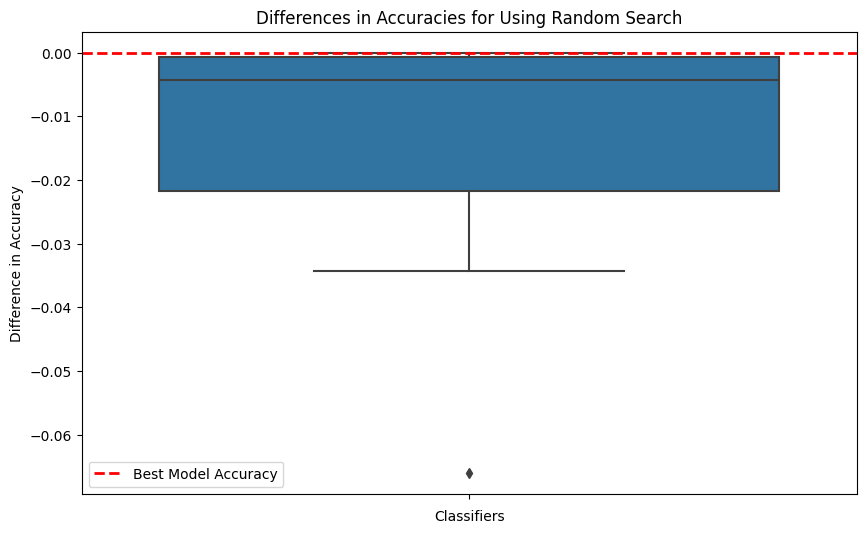

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=(random_df["mean"]-best_stat))
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Best Model Accuracy')
plt.title(f'Differences in Accuracies for Using Random Search')
plt.xlabel('Classifiers')
plt.ylabel('Difference in Accuracy')
plt.legend()
plt.show()


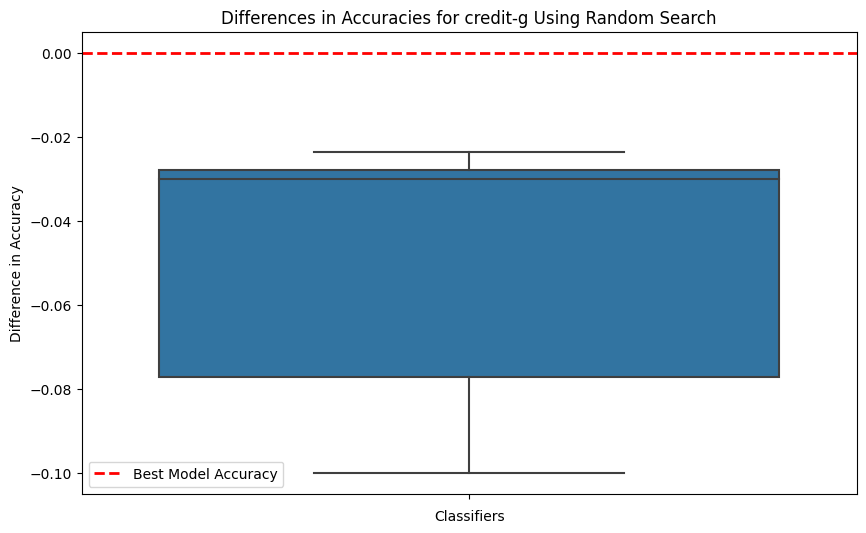

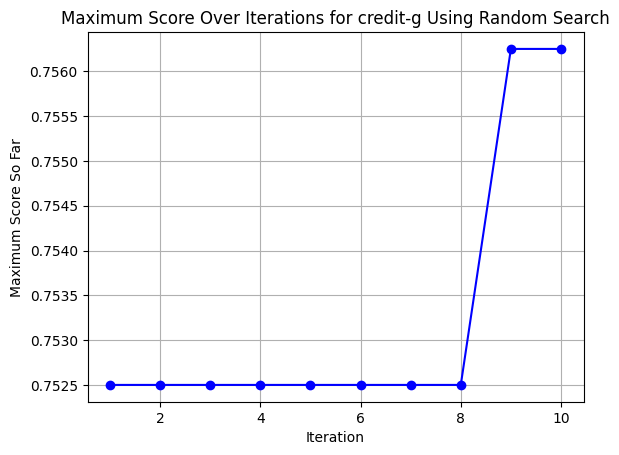

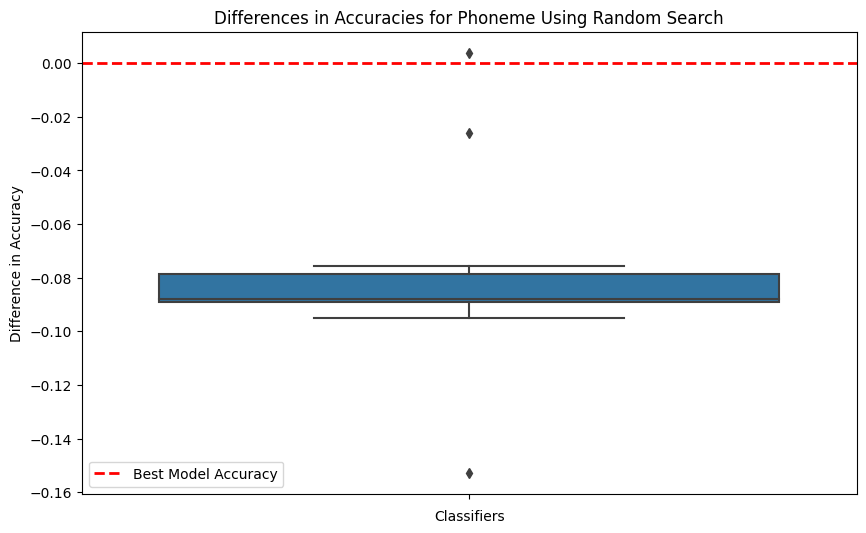

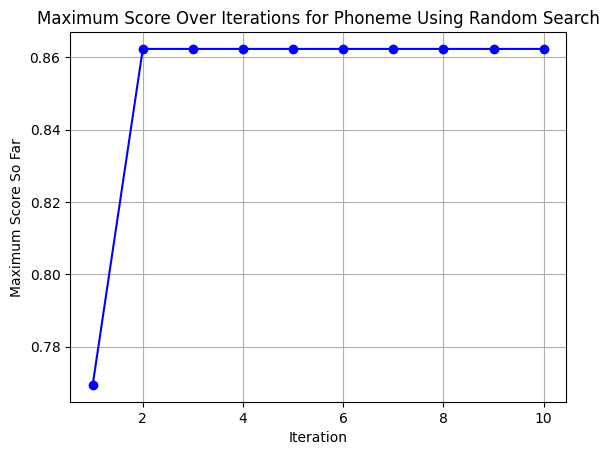

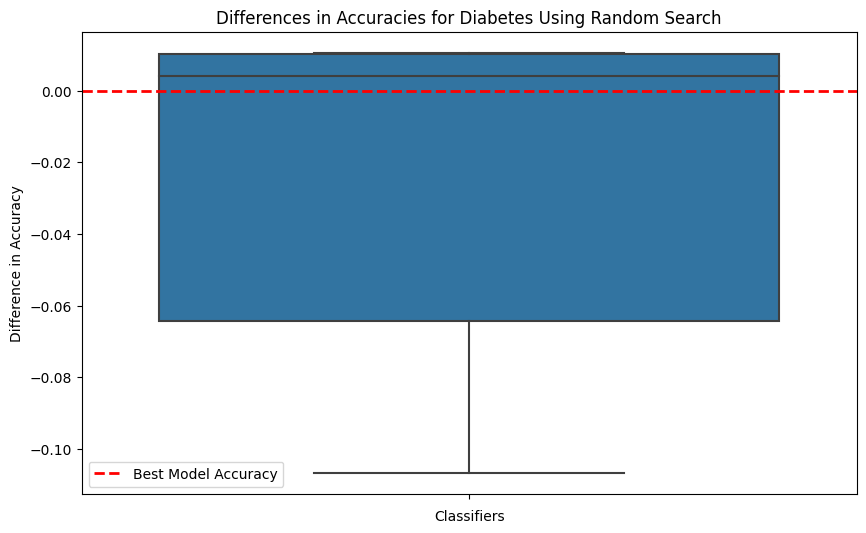

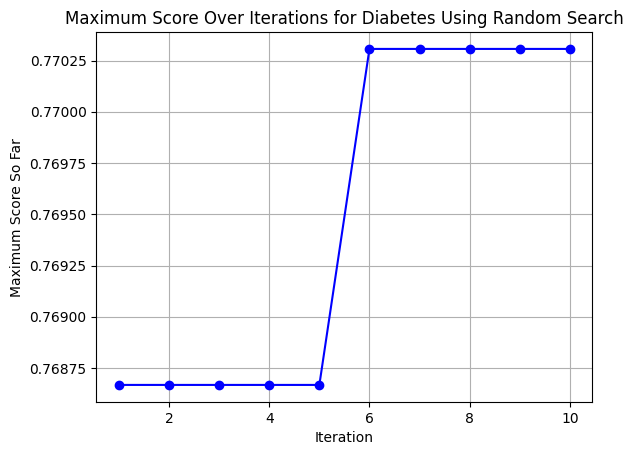

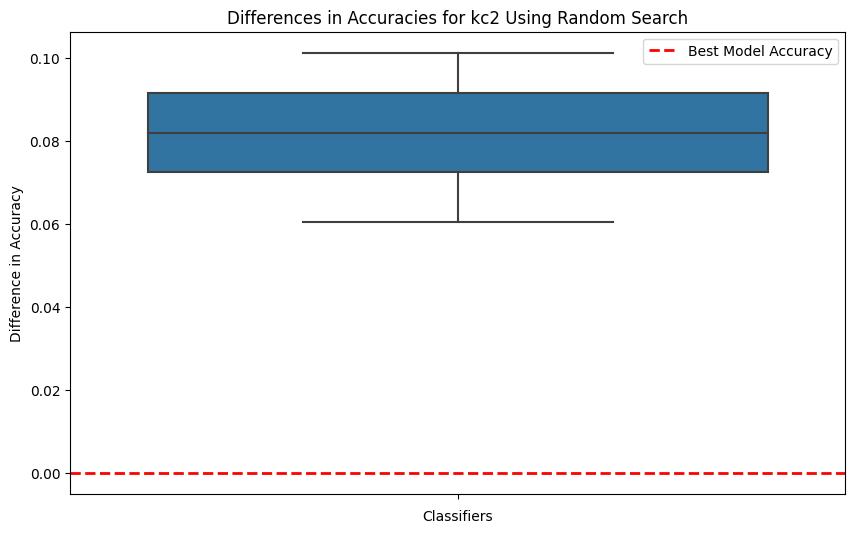

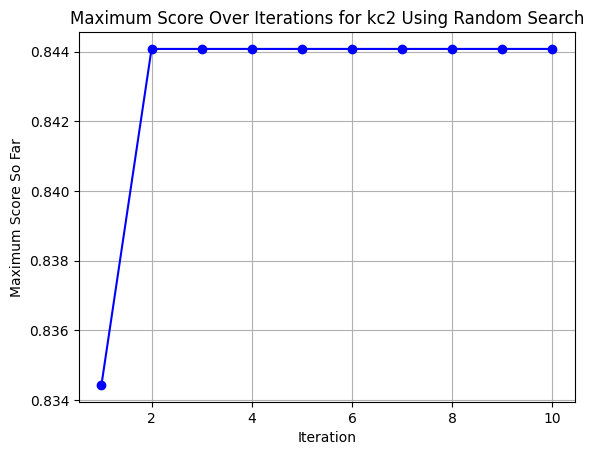

In [ ]:
# create all plots in separate loop
for (iter, dataset_name) in enumerate(datasets):
  # Create boxplots
  plt.figure(figsize=(10, 6))
  sns.boxplot(y=accuracy_diffs[iter])
  plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Best Model Accuracy')
  plt.title(f'Differences in Accuracies for {dataset_name} Using Random Search')
  plt.xlabel('Classifiers')
  plt.ylabel('Difference in Accuracy')
  plt.legend()
  plt.show()

  plt.plot(range(1, len(max_scores[iter]) + 1), max_scores[iter], marker='o', linestyle='-', color='b')
  plt.title(f'Maximum Score Over Iterations for {dataset_name} Using Random Search')
  plt.xlabel('Iteration')
  plt.ylabel('Maximum Score So Far')
  plt.grid(True)
  plt.show()

In [ ]:
random_df.to_csv('/content/random_SVC.csv', index=False)
files.download('/content/random_SVC.csv')

## Optymizacja Bayesowska


In [ ]:
# Define the search space for hyperparameters
param_space ={
    'C':(0.0,100.0),
    'gamma':(0.0,100.0),
    'kernel':("rbf","linear","poly"),
    }

In [ ]:
opt = BayesSearchCV(
    svc,
    param_space,
    n_iter=n_iter,  # Number of optimization steps
    cv=10,       # Number of cross-validation folds
    random_state=42,
    n_jobs=-1
)

In [ ]:
bayes_optim_results = []
bayes_results = []

In [ ]:
for dataset_name in datasets:
  X_train, X_test, y_train, y_test = preprocess_dataset(dataset_name)
  # Fit the optimizer on the training data
  opt.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = opt.best_params_
  print("Best Hyperparameters:", best_params)
  best_score = opt.best_score_
  # Evaluate the best model on the test set
  best_model = opt.best_estimator_
  test_accuracy = best_model.score(X_test, y_test)

  # Append results to the list
  bayes_optim_results.append({
      'Dataset': dataset_name,
      'Best_Parameters': best_params,
      'Best_Score': best_score,
      'Test_Accuracy': test_accuracy,
  })

  theta = opt.cv_results_['params']
  scores = opt.cv_results_['mean_test_score']
  bayes_results.append(pd.DataFrame({'theta': theta, 'score': scores}))

  result_filename = f'results_{dataset_name}_bayes_search.csv'
  with open(result_filename, 'w') as file:
    file.write(f'Best Parameters: {best_params}\n')
    file.write(f'Best Cross-Validation Accuracy: {best_score}\n')
    file.write(f'Test Set Accuracy: {test_accuracy}\n')
    file.write('\nMean Test Scores for all Classifiers:\n')

  files.download(result_filename)


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-15-978857f3a485>:4: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='array')


Best Hyperparameters: OrderedDict([('C', 44.48325123011519), ('gamma', 91.87225216693771), ('kernel', 'linear')])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
<ipython-input-15-978857f3a485>:4: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='array')


In [ ]:
bayes_results_df.to_csv('/content/bayes_results_df.csv', index=False)

In [ ]:
bayes_results_df = pd.concat(bayes_results, axis=1)
bayes_results_df

In [ ]:
#Create all four plots in a separate loop
for (iter, dataset_name) in enumerate(datasets):

  acc_diff = bayes_results_df.iloc[:,2*iter+1] - best_score_random
  # Create boxplots
  plt.figure(figsize=(10, 6))
  sns.boxplot(y=acc_diff)
  plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Best Model Accuracy Using Random Search')
  plt.title(f'Differences in Accuracies for {dataset_name} Using Bayesian Optimization')
  plt.xlabel('Classifiers')
  plt.ylabel('Difference in Accuracy')
  plt.legend()
  plt.show()

In [ ]:
bayes_optim_results

In [ ]:
bayes_results_df.to_csv('/content/bayes_results_df.csv', index=False)
files.download('/content/bayes_results_df.csv')